In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the c

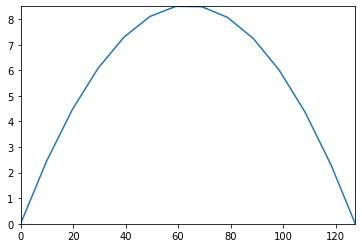

Range: theoretical: 127.55 m, calculated: 127.55 m


In [52]:
g = 9.8

tEval = np.linspace(0, 10, 50)
def event1(t, y):
    event1.terminal = True
    event1.direction = -1
    return y[0]

def rhsFun(t, y):
    # y =  [y,   v_y, x,   v_x]
    # y' = [v_y. a_y, v_x, a_x]
    yPrime = [0, 0, 0, 0]
    
    yPrime[0] = y[1]
    yPrime[1] = -g
    yPrime[2] = y[3]
    yPrime[3] = 0
    
    return yPrime

v0 = 50
alpha = 15 * (np.pi/180)
Y0 = (0.001, v0*np.sin(alpha), 0, v0*np.cos(alpha))

sol1 = solve_ivp(rhsFun, (0, 10), Y0, t_eval=tEval, events=event1)

rangeSim = sol1.y_events[0][0][2]
# Note indexing: first zero is because we want the first type of event. Secon zero is because we want the first instance
plt.plot(sol1.y[2], sol1.y[0])
plt.ylim([0, max(sol1.y[0])])
plt.xlim([0, sol1.y_events[0][0][2]])
plt.xlabel
#plt.ylim([0, max(sol1.y[0])])
plt.show()

rangeTheoretical = (v0**2/g)*np.sin(2*alpha)

print("Range: theoretical: %.2f m, calculated: %.2f m" % (rangeTheoretical, rangeSim))

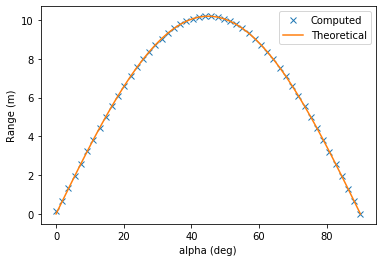

In [66]:
def getRange(v0, alpha):
    # Be careful, "range" is a (reserved) keyword
    
    alpha = alpha * (np.pi/180)
    Y0 = (0.001, v0*np.sin(alpha), 0, v0*np.cos(alpha))
    sol1 = solve_ivp(rhsFun, (0, 10), Y0, events=event1)
    rangeSim = sol1.y_events[0][0][2]
    return rangeSim

v0 = 10
alphas = np.linspace(0, 90, 50) 
ranges = np.zeros_like(alphas)

for i, alpha in enumerate(alphas):
    ranges[i] = getRange(v0, alpha)

rangesTheoretical = (v0**2/g)*np.sin(2*alphas*(np.pi/180))
plt.plot(alphas, ranges, 'x', alphas, rangesTheoretical)
plt.xlabel('alpha (deg)')
plt.ylabel('Range (m)')
plt.legend(('Computed', 'Theoretical'))
plt.show()

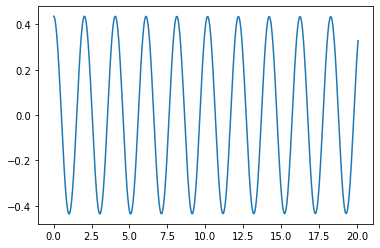

In [73]:
g = 9.8
L = 1.0

def rhsPendulum(t, y):
    # y = [theta, dtheta / dt]
    yPrime = [0, 0]
    yPrime[0] = y[1]
    yPrime[1] = -(g/L)*np.sin(y[0])
    return yPrime
    
theta0 = 25*np.pi/180
y0 = [theta0, 0]
tF =  20*np.pi*np.sqrt(L/g)
tEval = np.linspace(0, tF, 1000)
sol = solve_ivp(rhsPendulum, (0, tF), y0, t_eval=tEval)

plt.plot(sol.t, sol.y[0])
plt.show()

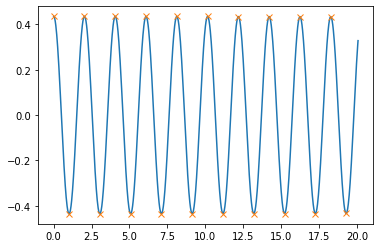

In [99]:
def getMaxMinTheta(t, y):
    return y[1]

theta0 = 25*np.pi/180
y0 = [theta0, 0]
tF =  10*2*np.pi*np.sqrt(L/g)
tEval = np.linspace(0, tF, 1000)
sol = solve_ivp(rhsPendulum, (0, tF), y0, t_eval=tEval, events=getMaxMinTheta)

tsForMaxTheta = sol.t_events[0]
maxMinThetas = sol.y_events[0][:, 0]
plt.plot(sol.t, sol.y[0], tsForMaxTheta, maxMinThetas, 'x')
plt.show()

In [98]:
numberOfHalfPeriods = len(tsForMaxTheta)
tInterval = tsForMaxTheta[-1] - tsForMaxTheta[0]

periodComp = (2*numberOfHalfPeriods) / tInterval
periodTheoretical = 2*np.pi*np.sqrt(L/g)
print("Period: computed: %.2f, theoretical: %.2f" % (periodComp, periodTheoretical))

Period: computed: 1.98, theoretical: 2.01


Text(0, 0.5, 'Period (seconds)')

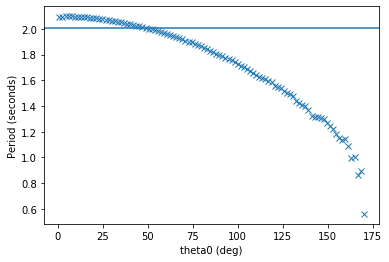

In [107]:
def getPeriod(theta0):
    theta0 = theta0*np.pi/180
    y0 = [theta0, 0]
    tF =  10*2*np.pi*np.sqrt(L/g)
    sol = solve_ivp(rhsPendulum, (0, tF), y0, events=getMaxMinTheta)
    tsForMaxTheta = sol.t_events[0]
    maxMinThetas = sol.y_events[0][:, 0]
    numberOfHalfPeriods = len(tsForMaxTheta)
    tInterval = tsForMaxTheta[-1] - tsForMaxTheta[0]
    periodComp = (2*numberOfHalfPeriods) / tInterval
    return periodComp

theta0s = np.linspace(1, 170, 100)
periods = np.zeros_like(theta0s)

for i, theta0 in enumerate(theta0s):
        periods[i] = getPeriod(theta0)
        
periodTheoretical = 2*np.pi*np.sqrt(L/g)
plt.plot(theta0s, periods, 'x')
plt.axhline(periodTheoretical)
plt.xlabel('theta0 (deg)')
plt.ylabel('Period (seconds)')